In [4]:
# 데이터 로드
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import os

In [6]:
# 데이터셋의 크기 확인
path = 'E:\Study\TeamProject_2\Dataset_CCTV\Image_Data\주간\맑음\실증'
image_files = os.listdir(path) # 지정된 경로(path)에 있는 모든 파일과 디렉토리의 이름을 리스트 형태로 반환
print(f'Number of images: {len(image_files)}')


Number of images: 55


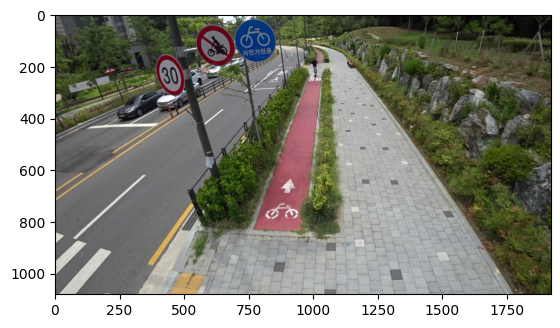

In [11]:
# 이미지 확인
import numpy as np

random_files = np.random.choice(image_files, size=1)

for file in random_files:
    image = Image.open(f'{path}/{file}')
    plt.imshow(image)
    plt.show()


In [16]:
# 이미지의 크기 확인
sizes = []
for file in image_files:
    image = Image.open(f'{path}/{file}')
    sizes.append(image.size)

print(f'Min size: {min(sizes)}')
print(f'Max size: {max(sizes)}')

Min size: (1920, 1080)
Max size: (1920, 1080)


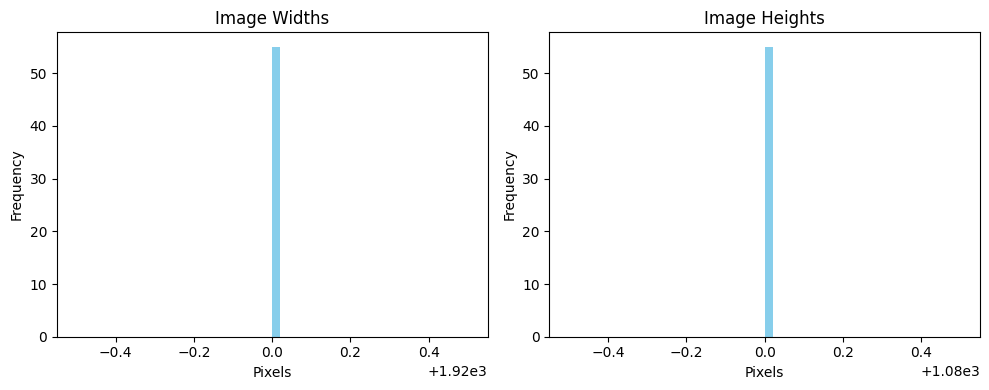

In [18]:
# 이미지 길이와 높이 저장 리스트 초기화
widths = []
heights = []

# 이미지 길이와 높이 측정
for file in image_files:
    image = Image.open(f'{path}/{file}') # f'{path}/{file}'은 현재 처리하고 있는 이미지 파일의 전체 경로
    width, height = image.size
    widths.append(width)
    heights.append(height)

widths = np.array(widths)
heights = np.array(heights)

# 이미지 길이 분포
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(widths, bins=50, color='skyblue')
plt.title('Image Widths')
plt.xlabel('Pixels')
plt.ylabel('Frequency')

# 이미지 높이 분포
plt.subplot(1, 2, 2)
plt.hist(heights, bins=50, color='skyblue')
plt.title('Image Heights')
plt.xlabel('Pixels')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [28]:
import os
import json
from collections import Counter

# 레이블 파일이 저장된 디렉토리
directory = 'E:\Study\TeamProject_2\Dataset_CCTV\Labeling_Data\CCTV\야간\맑음\연출'

# 모든 레이블 파일에 대한 클래스 카운터
environment_counter = Counter()
pm_counter = Counter()

# 디렉토리의 모든 파일에 대해 반복
for filename in os.listdir(directory):
    # 파일이 .json으로 끝나는지 확인
    if filename.endswith('.json'):
        # JSON 파일 읽기
        with open(os.path.join(directory, filename), 'r') as f:
            labels = json.load(f)

        # 클래스 분포 확인
        environment_labels = labels['annotations']['environment']
        pm_labels = labels['annotations']['PM']

        environment_area_codes = [annotation['area_code'] for annotation in environment_labels]
        pm_codes = [annotation['PM_code'] for annotation in pm_labels]

        # 카운터 업데이트
        environment_counter.update(environment_area_codes)
        pm_counter.update(pm_codes)

# 결과 출력
print(f"'environment' area code distribution: {environment_counter}")
print(f"'PM' code distribution: {pm_counter}")


'environment' area code distribution: Counter({'1': 74, '2': 41, '3': 22, '5': 16, '9': 16, '7': 12, '8': 12, '4': 10, '12': 7, '10': 6, '11': 4})
'PM' code distribution: Counter({'28': 14, '29': 11, '30': 10, '27': 8, '20': 8, '22': 3, '35': 2, '13': 2, '24': 1, '15': 1, '23': 1})


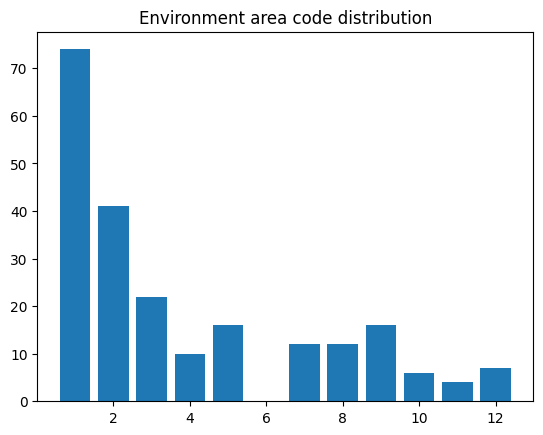

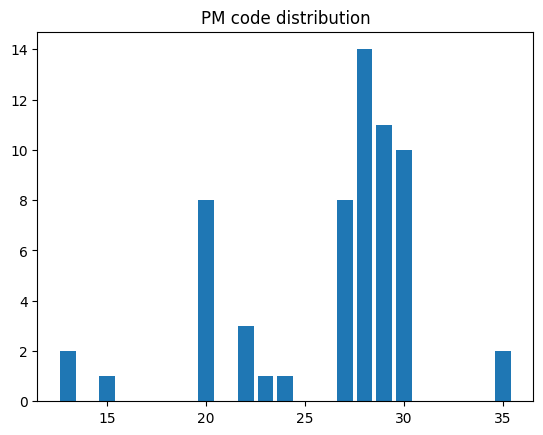

In [31]:
import matplotlib.pyplot as plt

# 오름차순으로 키를 정렬하고, 해당하는 값들도 같은 순서로 정렬
environment_keys, environment_values = zip(*sorted((int(k), v) for k, v in environment_counter.items()))
pm_keys, pm_values = zip(*sorted((int(k), v) for k, v in pm_counter.items()))

# 그래프 그리기
plt.bar(environment_keys, environment_values)
plt.title("Environment area code distribution")
plt.show()

plt.bar(pm_keys, pm_values)
plt.title("PM code distribution")
plt.show()
